In [2]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x57abe000 @  0x7fe1c966f2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [5]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Processing...
Done!


In [20]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


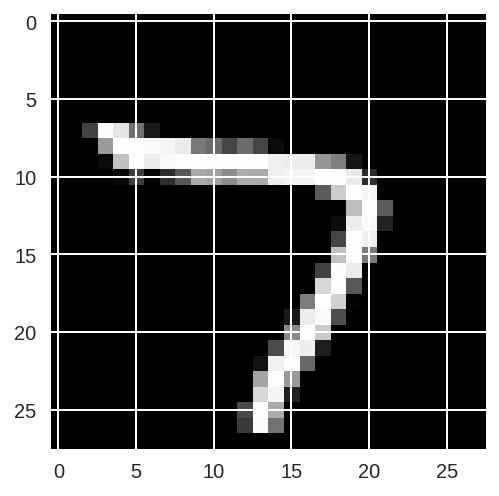

In [21]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');


In [50]:
#activation function as sigmoid 
def activation(x):
  return 1/(1+torch.exp(-x))

#inputs flattened
inputs=images.flatten(start_dim=1)
print(f"the images shape is {inputs.shape}")
#w1 and w2 matrix and bias matrix
w1=torch.randn(784,256)
print(f"the w1 shape is {w1.shape}")
b1=torch.randn(256)
print(f"the b1 shape is {b1.shape}")
w2=torch.randn(256,10)
print(f"the w2 shape is {w2.shape}")
b2=torch.randn(10)
print(f"the b2 shape is {b2.shape}")
p=torch.mm(inputs,w1)
print(f"the shape of x*w1 is {p.shape}")
#first output passed to input to
h=activation(torch.mm(inputs,w1)+b1)
print(f"the shape of h is {h.shape}")      
o=torch.mm(h,w2)+b2
print(f"the shape of o is o.shape")
print(o)

the images shape is torch.Size([64, 784])
the w1 shape is torch.Size([784, 256])
the b1 shape is torch.Size([256])
the w2 shape is torch.Size([256, 10])
the b2 shape is torch.Size([10])
the shape of x*w1 is torch.Size([64, 256])
the shape of h is torch.Size([64, 256])
the shape of o is o.shape
tensor([[ -1.4421, -15.4049,   0.1666,   1.5875, -12.7904,  -1.8929, -11.5200,
           8.0298, -18.4965,   1.7093],
        [  2.5920, -13.5610,   2.5583,   7.5801, -15.3125, -13.9436,  -3.8513,
          12.6986, -10.0973,   6.6254],
        [  1.4429, -13.3909,  -0.5580,   8.1971,  -9.2776,   1.0251,  -5.3879,
           3.6100, -17.2144,   0.5334],
        [ -3.4263,  -7.2488,   0.2962,  -4.4456, -14.2005,  -1.1767,  -3.3774,
           8.6480,  -5.1414,   5.2002],
        [ -2.0947, -18.5011,  -6.3643,   9.6853, -19.9027,  -1.5665, -14.5723,
          11.3246, -21.5050,   9.3365],
        [ -8.3400, -17.2350,   2.3673,   0.4482, -19.6744, -10.8141, -11.8371,
          11.4696, -18.6531,   

In [53]:
#softmax function for probability distribution for multi-class
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1) #dimension has to be reshaped when taking sum of tensors because numerator is 64x10 and denominaor will give us 64 so rank 2 and rank 1 can't be operated together and hecne rank -1 is changed to rank -2 by view otherwise broadcasting could get us unexpected output
  #also now each one of the value in the  row in numerator gets divided by one of corresponding row value in denominator.
probabilities=softmax(o)
print(probabilities)
print(probabilities.shape)
s=torch.sum(probabilities,dim=1) 
print(s.shape)
print(s)


tensor([[7.6686e-05, 6.6180e-11, 3.8312e-04, 1.5864e-03, 9.0401e-10, 4.8853e-05,
         3.2206e-09, 9.9611e-01, 3.0065e-12, 1.7919e-03],
        [4.0469e-05, 3.9082e-12, 3.9128e-05, 5.9352e-03, 6.7812e-13, 2.6657e-12,
         6.4395e-08, 9.9170e-01, 1.2480e-10, 2.2845e-03],
        [1.1512e-03, 4.1586e-10, 1.5567e-04, 9.8742e-01, 2.5429e-08, 7.5815e-04,
         1.2434e-06, 1.0054e-02, 9.0874e-12, 4.6367e-04],
        [5.5270e-06, 1.2089e-07, 2.2864e-04, 1.9943e-06, 1.1569e-10, 5.2418e-05,
         5.8041e-06, 9.6888e-01, 9.9456e-07, 3.0825e-02],
        [1.1165e-06, 8.3683e-14, 1.5616e-08, 1.4583e-01, 2.0604e-14, 1.8935e-06,
         4.2549e-12, 7.5128e-01, 4.1501e-15, 1.0289e-01],
        [2.3616e-09, 3.2370e-13, 1.0552e-04, 1.5484e-05, 2.8231e-14, 1.9894e-10,
         7.1519e-11, 9.4711e-01, 7.8389e-14, 5.2772e-02],
        [5.2745e-07, 2.9681e-13, 7.5056e-01, 9.1478e-05, 8.6149e-13, 8.0600e-08,
         5.5705e-12, 2.4510e-01, 8.4592e-12, 4.2533e-03],
        [4.4817e-09, 4.7710